# Homework3: Instructions

Team Members:

* Deepan Chakravarthi Padmanabhan
* Jaswanth Bandlamudi
* Muhammad Umer Ahmed Khan

1. Write down 3 questions and their brief answers on the reading material. [2 Points]

1) What are the two useful properties of a regressive model?

Ans)
1. The mean value of the expectational error e, given any realization x is zero. 

E[e|x] = 0, where E is the statistical expectation operator.

As a corollary, we state that the regression function f(x) is the conditional mean of the model output D, given that the input X=x as shown below:

f(x) = E[D|x]

2. The expectational error e is uncorrelated with the regression function f(X). 

E[ef(X)] = 0.

This property is known as **principle of orthogonality**. 


2) What are different learning processes and where are they derived from ?

Ans) The different learning algorithms and their sources are 
            1) Error Correction Learning is derived from Optimum filtering methods
            2) Memory based learning is derived by storing all the training data.
            3) Hebbian Learning is derivied from Neuro Biological methods
            4) Competitive learning is derived from Neurobiological methods
            5) Boltzmann learning is derived from statistical mechanics
            
3) What are different hebbian synaptics classified ?

Ans) 1) Hebbain
     2) Anti-Hebbian
     3) Non-Hebbian
     
4) What are three basic elements of competitive learning ?

Ans) 
▫ Same type of neurons with different weights, So they respond differently to different inputs. 
▫ A limit imposed on the strength of each neuron.
▫ Competition mechanism, to choose one winner:winner-takes-all neuron.
 

2. From the Chapter 2 Haykin’s book solve 2.1 [8 Points]

The equation 2.3 is the delta rule or widrow hoff rule which is
$$ \Delta w_{kj}(n) = \eta e_{k}(n)x_{j}(n) $$

The equation 2.9 is the Hebbians learning rule which is
$$ \Delta w_{kj}(n) = \eta y_{k}(n)x_{j}(n) $$

 
Delta rule:
1. The adjustment to synaptic weight of a neuron is proportional to the product of the error signal and input signal of the synapse.
2. Used for supervised learning.
3. The data used in this type of learning requires the desired output information.
4. Error calculation is necessary.

Hebbs rule:
1. The adjustment to synaptic weight of a neuron is proportional to the product of presynaptic and postsynaptic signals of the synapse.
2. Used for unsupervised leanring.
3. Desired output information is not required.
4. No Error calculation.

3. Using the parameters from the ex 2.10 ( Chapter 2 Haykin’s book ) programm competetive learning. Hint: use a standard network of neurons followed by a max-net implementation! keyword is: max-net [8 Points]

In [1]:
# Import required tools and libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import datasets

winner 0
weights [[0.33333333 0.66666667]
 [0.00994079 0.02993093]
 [0.59088147 0.29392555]]


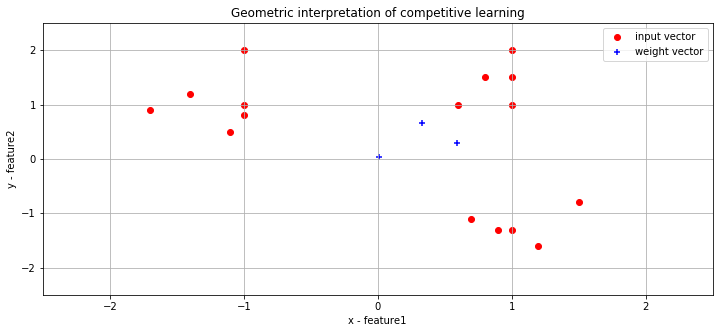

winner 0
weights [[0.5        0.5       ]
 [0.00994079 0.02993093]
 [0.59088147 0.29392555]]


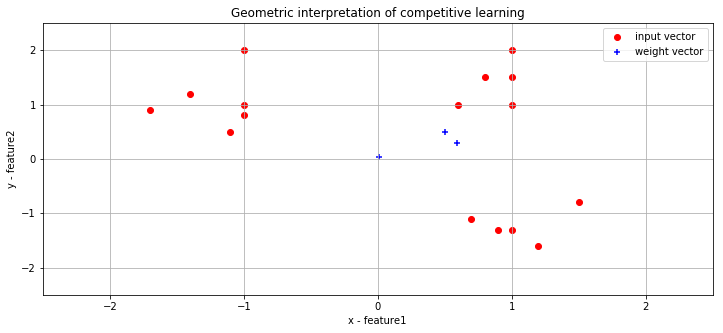

winner 0
weights [[0.4        0.6       ]
 [0.00994079 0.02993093]
 [0.59088147 0.29392555]]


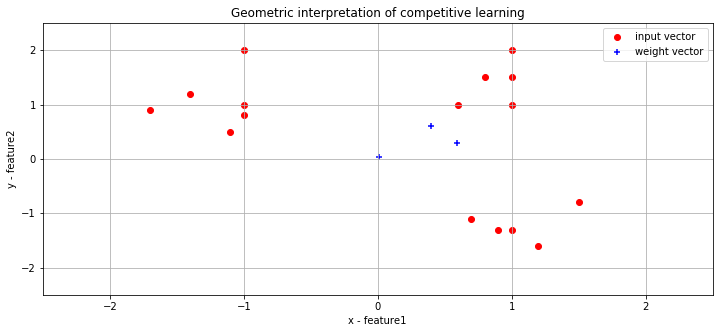

winner 0
weights [[0.34782609 0.65217391]
 [0.00994079 0.02993093]
 [0.59088147 0.29392555]]


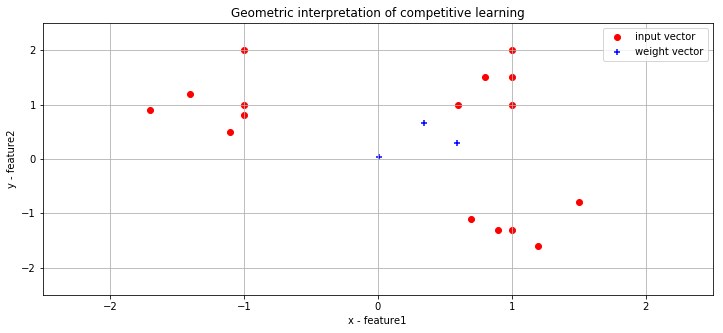

winner 0
weights [[0.375      0.625     ]
 [0.00994079 0.02993093]
 [0.59088147 0.29392555]]


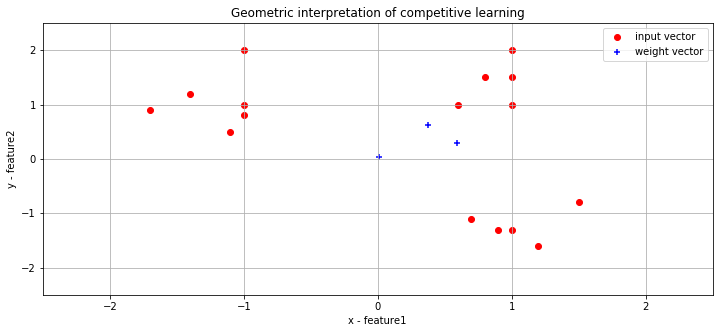

winner 0
weights [[-0.5         0.5       ]
 [ 0.00994079  0.02993093]
 [ 0.59088147  0.29392555]]


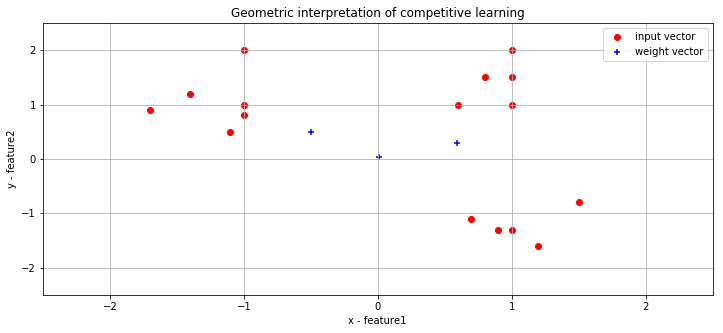

winner 0
weights [[-0.55555556  0.44444444]
 [ 0.00994079  0.02993093]
 [ 0.59088147  0.29392555]]


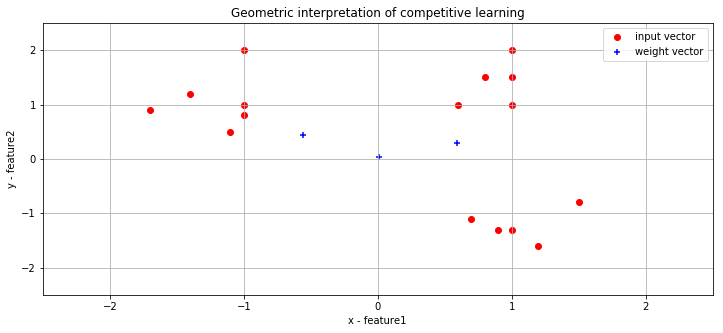

winner 0
weights [[-0.33333333  0.66666667]
 [ 0.00994079  0.02993093]
 [ 0.59088147  0.29392555]]


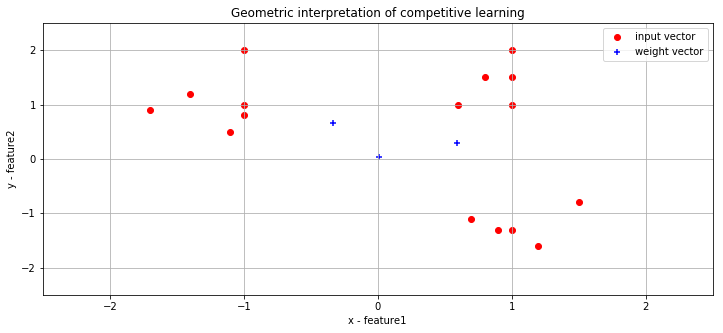

winner 0
weights [[-0.53846154  0.46153846]
 [ 0.00994079  0.02993093]
 [ 0.59088147  0.29392555]]


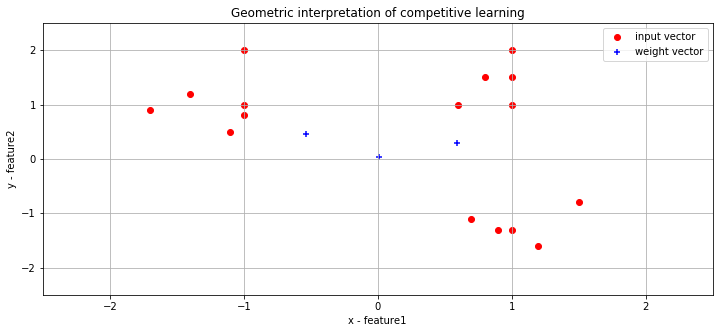

winner 0
weights [[-0.6875      0.3125    ]
 [ 0.00994079  0.02993093]
 [ 0.59088147  0.29392555]]


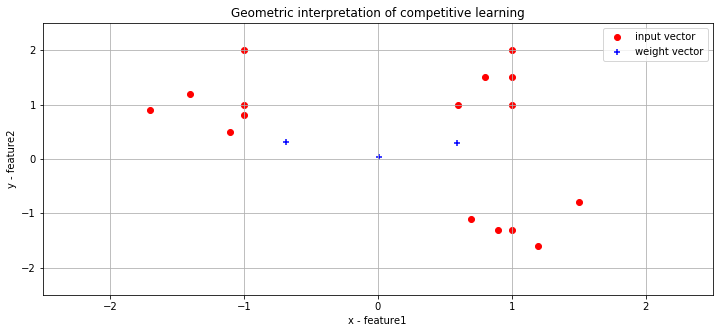

winner 0
weights [[-0.65384615  0.34615385]
 [ 0.00994079  0.02993093]
 [ 0.59088147  0.29392555]]


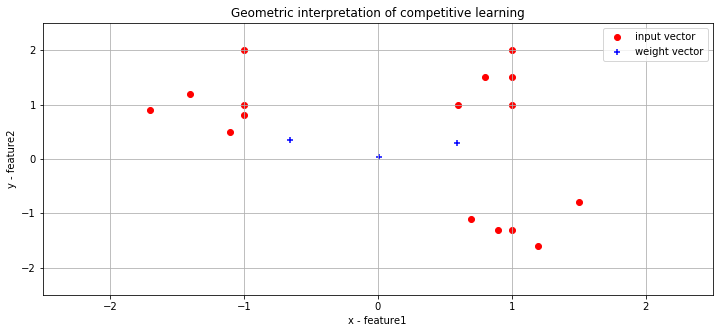

winner 2
weights [[-0.65384615  0.34615385]
 [ 0.00994079  0.02993093]
 [ 0.43478261 -0.56521739]]


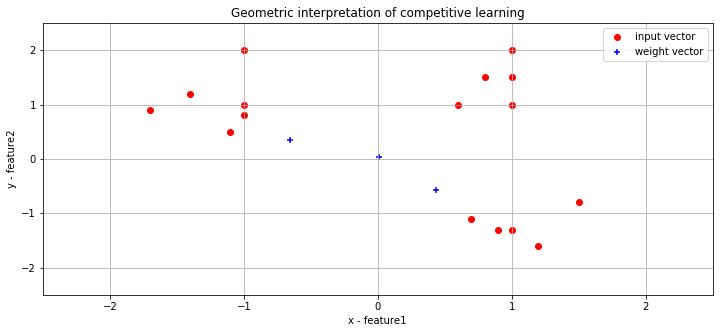

winner 2
weights [[-0.65384615  0.34615385]
 [ 0.00994079  0.02993093]
 [ 0.65217391 -0.34782609]]


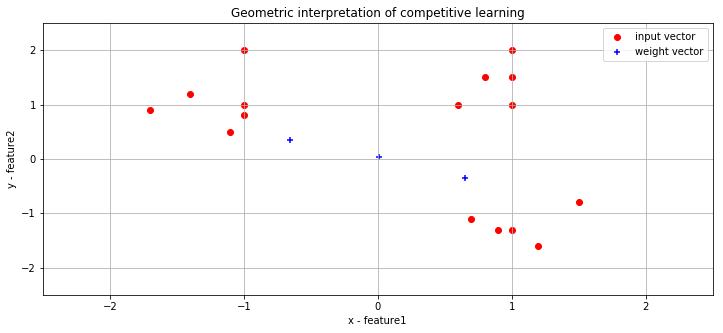

winner 2
weights [[-0.65384615  0.34615385]
 [ 0.00994079  0.02993093]
 [ 0.42857143 -0.57142857]]


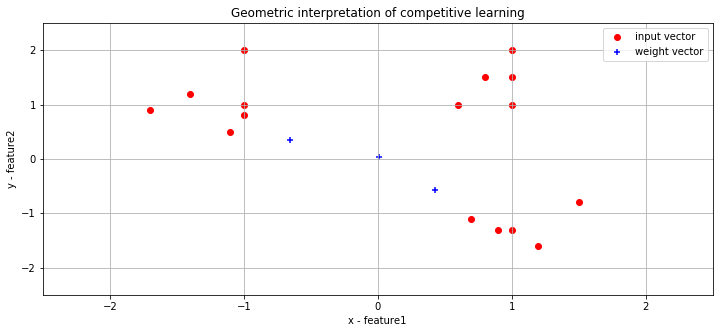

winner 2
weights [[-0.65384615  0.34615385]
 [ 0.00994079  0.02993093]
 [ 0.40909091 -0.59090909]]


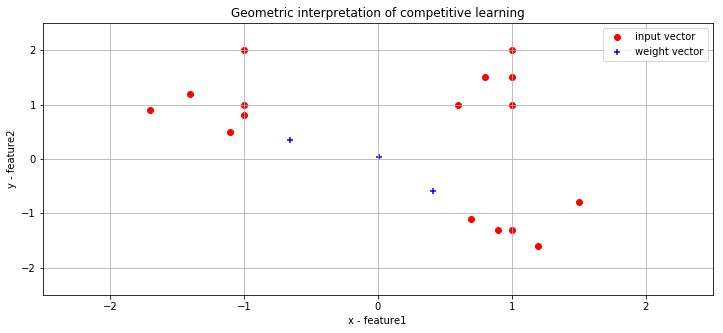

winner 2
weights [[-0.65384615  0.34615385]
 [ 0.00994079  0.02993093]
 [ 0.38888889 -0.61111111]]


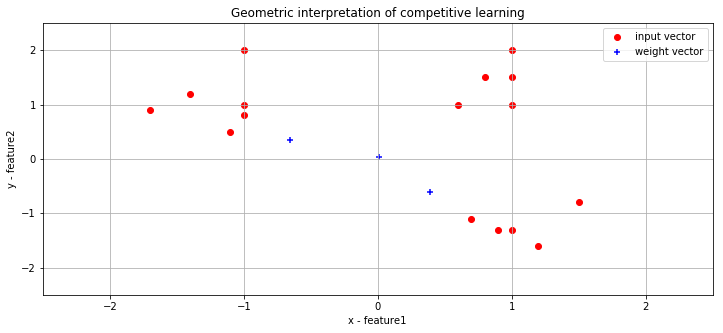

In [3]:
def get_max_net(num_outputs):
    epsilon = np.random.uniform(0,1/num_outputs)
    max_net_weights = np.empty((num_outputs,num_outputs))
    max_net_weights.fill(-epsilon)
    np.fill_diagonal(max_net_weights,1)
    return max_net_weights

def max_net(distance,max_net_weights):
    while np.count_nonzero(distance)>1:
        distance = np.dot(distance, max_net_weights)
        distance = np.where(distance<0, 0, distance)
    winner = np.nonzero(distance)[0][0]
    return winner

def update_weight(learning_rate, winner, weights, x_input):
    weights = weights.T
    delta_change = learning_rate * (x_input - weights[winner])
    weights[winner] = weights[winner] + delta_change
    weights[winner] = weights[winner]/np.sum(abs(weights[winner]))
    weights = weights.T
    return weights

def plot_geometric_interpretation(x_input, weights):
    plt.figure(figsize=(12, 5))
    plt.scatter(x_input[:,0], x_input[:,1], marker='o',c='r',label='input vector')
    plt.scatter(weights.T[:,0], weights.T[:,1], marker='+',c='b',label='weight vector')
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.grid(True)
    plt.legend()
    plt.title("Geometric interpretation of competitive learning")
    plt.xlabel('x - feature1')
    plt.ylabel('y - feature2')
    plt.show()
    

# Generate dataset to train a competitive neural net.
x_input = np.array([[1,2],[1,1],[1,1.5],[0.8,1.5],[0.6,1],
                    [-1,1],[-1,0.8],[-1,2],[-1.4,1.2],[-1.1,0.5],[-1.7,0.9],
                    [1,-1.3],[1.5,-0.8],[1.2,-1.6],[0.9,-1.3],[0.7,-1.1]])
num_outputs = 3
# weight vector by random initialization
weights = np.random.rand(x_input.shape[1],num_outputs)
# Normalizing the weight ST, the sum of weights to a neuron is 1.
weights = weights/weights.sum(axis=1,keepdims=1)
# Get the max_net matrix weights
max_net_weights = get_max_net(num_outputs)
learning_rate =1

for point in x_input:
    distance = list()
    for weight in weights.T:
        distance.append(point.dot(weight))
    # Find the winning neuron for updation
    winner = max_net(distance, max_net_weights)
    print("winner",winner)
    # update weights
    weights = update_weight(learning_rate, winner, weights,point)
    print("weights",weights.T)
    plot_geometric_interpretation(x_input,weights)
    

    

The given neural network has 4 neurons in the input layer and 3 neurons in the output layer. 

![Competitive Learning](.\CompetitiveLearning.png)

The competitive learning algorithm is an iteratve process which updates the weights of the synapses until a positive activation is achieved

Since the implementation of inhibitory network is max net , The neural network need not be trained but only the inhibitory weights are modified only.

The activation function looks like below

![Activation Function](.\eq5.png)

$\textbf{Step 0 :}  $ • Initialize activations and set weights 

![Activation Function](.\eq2.png)

While there is a positive activation from atleast one neuron the iteration should continue

$\textbf{Step 1 :}  $ •  Update the activation of each node 

![Activation Function](.\eq4.png)

$\textbf{Step 2 :}  $ •  If more than one node has non zero activation then repeat from step 1 again.

At the end the weights of the neural network is like this 

![Activation Function](.\eq3.png)

Ex: Let us consider a max net implementation in the above example be initialized with weight of 0,25 (< 1/3) and the net is initially activated by inputs [0.3, 0.1, 0.9]

Iteration 1:

$y_{1}[1] = 0.3 - 0.25(0.1+0.9) = 0.05  $

$y_{2}[1] = 0.1 - 0.25(0.3+0.9) = 0  $

$y_{3}[1] = 0.9 - 0.25(0.1+0.3) = 0.8  $

Iteration 2:

$y_{1}[2] = 0,05 - 0.25(0.0+0.8) = 0  $

$y_{2}[2] = 0 - 0.25(0.05+0.8) = 0   $

$y_{3}[2] = 0.8 - 0.25(0.05+0) = 0.7875  $


So Here the third neuron won and takes all the rest of network

4. A simple network is given below (from lecture slides). You have to update the weights once using Boltzmann learning for this network. Please do calculations by hand or by using Python.  
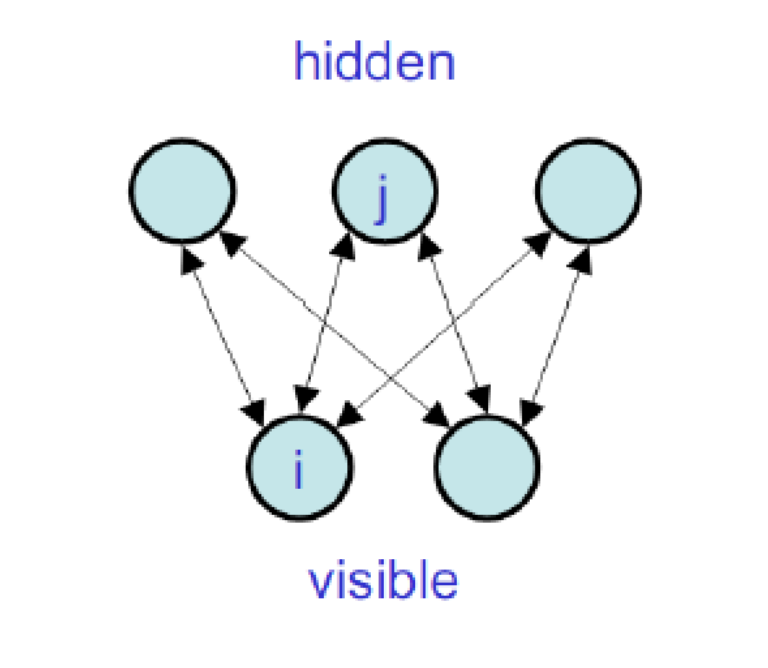
Use random numbers to initialise the weights. For training use a training set as [(0, 1), (1,
0)] or any training set of your choice. [8 Points]

In [32]:
class RBM:
  
    def __init__(self, num_visible, num_hidden):
        self.num_hidden = num_hidden
        self.num_visible = num_visible

        # Initialize a weight matrix of dimensions (num_visible x num_hidden)
        # using a uniform distribution between -sqrt(6. / (num_hidden + num_visible))
        # and sqrt(6. / (num_hidden + num_visible))
        
        # Reference: Understanding the difficulty of training deep feedforward 
        # neural networks by Xavier Glorot and Yoshua Bengio
        # Available at: http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf [3]
        
        np_rng = np.random.RandomState(1234)

        self.weights = np.asarray(np_rng.uniform(low=-0.1 * np.sqrt(6. / (num_hidden + num_visible)),
                                                 high=0.1 * np.sqrt(6. / (num_hidden + num_visible)),
                                                 size=(num_visible, num_hidden)))

        # Insert weights for the bias units into the first row and first column.
        self.weights = np.insert(self.weights, 0, 0, axis = 0)
        self.weights = np.insert(self.weights, 0, 0, axis = 1)
        print("\nInitial weight:\n", self.weights)

    def train(self, data, max_epochs = 1000, learning_rate = 0.1):
    # Training a RBM
    # Data: Row matrix serving as visible units.
        num_examples = data.shape[0]

        # Insert bias units of 1 into the first column.
        data = np.insert(data, 0, 1, axis = 1)

        for epoch in range(max_epochs):      
            # Clamp to the data and sample from the hidden units. 
            pos_hidden_activations = np.dot(data, self.weights)  
            pos_hidden_probs = self._logistic(pos_hidden_activations)
            pos_hidden_probs[:,0] = 1 # Fix the bias unit.
            
            # Reference: section 3 of Hinton's 
            # "A Practical Guide to Training Restricted Boltzmann Machines". [2]
            # Information given: The hidden unit turns on if this probability is greater
            # than a random number uniformly distributed between 0 and 1
            
            pos_hidden_states = pos_hidden_probs > np.random.rand(num_examples, self.num_hidden + 1)
            
            # Use the activation probabilities of the hidden states and not the hidden states       
            pos_associations = np.dot(data.T, pos_hidden_probs)
            
            # Reconstruct the visible units and sample again from the hidden units.
            
            # Very important to use pos hidden states and not probabilities
            # as it violates the bottleneck created by
            # the fact that a hidden unit can convey at most one bit. For Regularization purpose.
            neg_visible_activations = np.dot(pos_hidden_states, self.weights.T)
            neg_visible_probs = self._logistic(neg_visible_activations)
            neg_visible_probs[:,0] = 1 # Fix the bias unit.
            neg_hidden_activations = np.dot(neg_visible_probs, self.weights)
            neg_hidden_probs = self._logistic(neg_hidden_activations)
            
            # Use the activation probabilities of the hidden states and not the hidden states       
            neg_associations = np.dot(neg_visible_probs.T, neg_hidden_probs)

            # Update weights.
            self.weights += learning_rate * ((pos_associations - neg_associations) / num_examples)

            error = np.sum((data - neg_visible_probs) ** 2)
            
        print("\nAfter %s epoch, the error is %s" % (epoch+1, error))        
      
    def _logistic(self, x):
        return 1.0 / (1 + np.exp(-x))

if __name__ == '__main__':
    r = RBM(num_visible = 2, num_hidden = 3)
    training_data = np.array([[0,1],[1,0]])
    r.train(training_data, max_epochs = 5000)
    print("\nFinal weights:\n",r.weights) # Bias is along the first row and first column.


Initial weight:
 [[ 0.          0.          0.          0.        ]
 [ 0.         -0.0675847   0.02675269 -0.01364317]
 [ 0.          0.06251893  0.06133963 -0.04982246]]

After 5000 epoch, the error is 2.6341354546487517e-05

Final weights:
 [[ 5.38096941  0.61583004  0.26048898  0.40917927]
 [ 0.80410331 -6.99974605  0.25426208  5.23405884]
 [ 1.04905582  5.96724186 -1.46890227 -6.57526238]]


References: 

1. Edwin Chen, "Introduction to Restricted Boltzmann Machines", Available on:$\href{http://blog.echen.me/2011/07/18/introduction-to-restricted-boltzmann-machines/}{RestrictedBoltzmannMachines}$, Viewed on: 16.10.2019.
2. Hinton, Geoffrey E. "A practical guide to training restricted Boltzmann machines." In Neural networks: Tricks of the trade, pp. 599-619. Springer, Berlin, Heidelberg, 2012.
3. Glorot, Xavier, and Yoshua Bengio. "Understanding the difficulty of training deep feedforward neural networks." In Proceedings of the thirteenth international conference on artificial intelligence and statistics, pp. 249-256. 2010.

5. (if VCdim got covered in class) Consider the space of instances X corresponding to all points in the x, y plane. Give the VC dimension of the following hypothesis spaces:  
a. Hr = the set of all rectangles in the x,y plane. i.e. Hr = {((a<x<b) ^(c<y<d)) | a, b, c, d є IR}  
b. Hc = the set of all circles in the x,y plane. Points inside the circle are classified as positive examples.  
c. Ht = the set of all triangle in the x,y plane. Points inside the triangle are classified as positive examples. [8 Points]

a. VC dimension for rectangles = 4

Consider the 4 points: {(1,0),(0,1),(−1,0),(0,−1)}. This can be shattered by a rectangle in all combinations with positive examples inside the rectangle. However, if you draw the smallest rectangle enclosing 5 points it is not possible to label the point inside the box positive and one negative point along the diagonal of the two positive points. This condition cannot be shattered. Therefore the maximum number of points that can be arranged so that the set of all rectangles in the x,y plane can shatter them is 4.  

b. VC dimension for circles = 3

VC dimension is atleast 3 since any 3 points forming a non-degenerate triangle (having positive area) can be shatterred. However, consider 4 points {(1,0),(0,1),(−1,0),(0,−1)}. In the case where they are positive, negative, positive, negative cannot be shattered. This proves the VC dimension of a set of all circles is 3 in 2D x,y plane.

c. VC dimension for triangles = 7

Consider 8 points {(1,0),(0.5,-0.5),(0,-1),(-0.5,-0.5),(−1,0),(-0.5,0.5),(0,1),(0.5,0.5)} in a combination positive, negative, positive, negative, positive, negative, positive, negative cannot be shattered by a triangle in 2D x,y plane. This proves the VC dimension of a set of all triangles is 7 in 2D x,y plane.
